## NEED THE AVERAGE SALARY FOR YEAR VS. MY TEAM SALARY

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batting = pd.read_csv("data/Batting.csv")
salaries = pd.read_csv("data/Salaries.csv")
master = pd.read_csv("data/Master.csv")
appearances = pd.read_csv("data/Appearances.csv")

In [3]:
batting = batting[batting.yearID.isin([1988])]

In [4]:
salaries = salaries[salaries.yearID.isin([1988])]

In [5]:
appearances = appearances[appearances.yearID.isin([1988])]

In [6]:
master = master.drop(["birthYear", "birthMonth", "birthDay", "birthCountry", "birthState", "birthCity", "deathYear", "deathMonth", "deathDay", "weight", "height", "bats", "throws", "debut", "finalGame", "retroID", "bbrefID"], axis=1)

In [7]:
master = master.drop(["deathCountry", "deathState", "deathCity", "nameGiven"], axis=1)

In [8]:
everything = pd.merge(batting, salaries, how="inner", left_on="playerID", right_on="playerID")

In [9]:
everything = pd.merge(everything, appearances, how="inner", left_on="playerID", right_on="playerID")

In [ ]:
everything.head()

In [10]:
everything = everything.set_index(["playerID"])

In [ ]:
everything.head()

In [11]:
everything = everything.drop(["stint", "teamID_x", "lgID_x", "yearID_y", "teamID_y", "lgID_y"], axis=1)

In [ ]:
everything.head()

In [ ]:
everything.columns

In [12]:
everything = everything.drop(["yearID", "teamID", "lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)

In [13]:
everything.head()

,yearID_x,G,AB,R,H,2B,3B,HR,RBI,SB,...,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of
playerID,,,,,,,,,,,,,,,,,,,,,
aasedo01,1988,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,0,0,0,0,0,0,0,0,0
abnersh01,1988,37,83,6,15,3,0,2,5,0,...,0,0,0,0,0,0,10,11,17,35
ackerji01,1988,21,5,0,2,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
agostju01,1988,75,5,0,0,0,0,0,0,0,...,75,0,0,0,0,0,0,0,0,0
aguaylu01,1988,49,97,9,24,3,0,3,5,2,...,0,0,0,13,33,6,0,0,0,0


In [14]:
everything = everything.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP"], axis=1)

In [15]:
everything = everything.drop(["IBB"], axis = 1)

In [16]:
everything["OBP"] = (everything.H + everything.HBP + everything.BB) / (everything.AB + everything.BB + everything.HBP +everything.SF)

In [17]:
everything = everything.drop(["H", "BB", "HBP", "SF"], axis=1)

In [18]:
everything = everything[pd.notnull(everything['OBP'])]

In [39]:
everything_hitters = everything.drop(everything[everything.G < 80].index)

In [23]:
everything_pitchers =everything.drop(everything[everything.G_p <= 1].index)

In [26]:
everything_pitchers = everything_pitchers.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)

In [28]:
everything_pitchers = pd.merge(everything_pitchers, master, how="inner", left_index=True, right_on="playerID")

In [29]:
everything_pitchers = everything_pitchers.set_index(["playerID"])

In [32]:
everything_pitchers = everything_pitchers.sort(columns="OBP", axis=0, ascending=False)

In [33]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything_pitchers)

           yearID_x   G  AB   salary  G_p       OBP  nameFirst     nameLast
playerID                                                                   
parreje01      1988  61   0    90000   61  1.000000       Jeff      Parrett
perrypa02      1988  35   1   132500   35  1.000000        Pat        Perry
perrypa02      1988  35   1   132500   12  1.000000        Pat        Perry
ackerji01      1988  21   5   435000   21  0.500000        Jim        Acker
suttebr01      1988  38   1  1729167   38  0.500000      Bruce       Sutter
halldr01       1988  19   1    68000   19  0.500000       Drew         Hall
quiseda01      1988  33   1  1562350   20  0.500000        Dan  Quisenberry
quiseda01      1988  33   1  1562350   33  0.500000        Dan  Quisenberry
leipeda01      1988  35   2    75000   35  0.500000       Dave       Leiper
mcculla01      1988  60   8   190000   60  0.333333      Lance    McCullers
mcdowro01      1988  63   9   615000   62  0.333333      Roger     McDowell
anderla02   

In [94]:
everything2.head(500)

,G,salary,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,OBP,nameFirst,nameLast
playerID,,,,,,,,,,,,,
boggswa01,155,1650000,0,0,0,151,0,0,0,0,0.475661,Wade,Boggs
greenmi01,158,205000,0,0,0,0,0,143,0,8,0.415584,Mike,Greenwell
davisal01,140,887500,0,115,0,0,0,0,0,0,0.412371,Alvin,Davis
winfida01,149,1958652,0,0,0,0,0,0,0,141,0.397781,Dave,Winfield
danieka01,140,185000,0,0,0,0,0,138,0,0,0.397284,Kal,Daniels
mullira01,119,600000,0,0,0,7,0,0,0,0,0.395466,Rance,Mulliniks
puhlte01,113,950000,0,0,0,0,0,48,1,33,0.394834,Terry,Puhl
henderi01,140,1770000,0,0,0,0,0,135,3,0,0.393798,Rickey,Henderson
butlebr01,157,900000,0,0,0,0,0,0,156,0,0.393443,Brett,Butler


In [40]:
everything_hitters = everything_hitters.sort(columns='OBP', axis=0, ascending=False)

In [41]:
everything_hitters = pd.merge(everything_hitters, master, how="inner", left_index=True, right_on="playerID")

In [42]:
everything_hitters = everything_hitters.set_index(["playerID"])

In [43]:
everything.head()

,yearID_x,G,AB,salary,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,OBP
playerID,,,,,,,,,,,,,,,
abnersh01,1988,37,83,63500,0,0,0,0,0,0,10,11,17,35,0.224719
ackerji01,1988,21,5,435000,21,0,0,0,0,0,0,0,0,0,0.500000
agostju01,1988,75,5,157500,75,0,0,0,0,0,0,0,0,0,0.000000
aguaylu01,1988,49,97,375000,0,0,0,13,33,6,0,0,0,0,0.336364
aguaylu01,1988,49,97,375000,0,0,0,2,13,27,0,0,0,0,0.336364


In [44]:
everything2 = everything_hitters.drop(["G_p", "G_of", "AB"], axis=1)

In [45]:
everything2 = everything2[["nameFirst", "nameLast", "OBP", "salary"]]

In [ ]:
everything3 = everything_hitters[["G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf"]]

In [ ]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything2)

In [ ]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything3)

In [77]:
my_team = {"Player": ["Will Clark", "Jose Oquendo", "Kevin Sietzer", "Jody Reed", "Mike Greenwell", "Ellis Burks", "Jose Canseco", "Geno Petralli", "Sid Fernandez"], "Salary": [320000, 275000, 175000, 64500, 205000, 125000, 325000, 135000, 580000], "OBP": [0.386, 0.350, 0.386, 0.380, 0.416, 0.367, 0.390, 0.356, 0.308]}

In [78]:
team_frame = pd.DataFrame.from_dict(my_team)

In [37]:
team_frame = team_frame.set_index(["player"])

In [79]:
team_frame

,OBP,Player,Salary
0,0.386,Will Clark,320000
1,0.350,Jose Oquendo,275000
2,0.386,Kevin Sietzer,175000
3,0.380,Jody Reed,64500
4,0.416,Mike Greenwell,205000
5,0.367,Ellis Burks,125000
6,0.390,Jose Canseco,325000
7,0.356,Geno Petralli,135000
8,0.308,Sid Fernandez,580000


In [58]:
team_frame.mean()

OBP            0.371000
salary    244944.444444
dtype: float64

In [59]:
team_avg_salary = round(244944.444444, 2)
team_avg_obp = 0.371

In [46]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
1915,1988,ATL,NL,ackerji01,435000
1916,1988,ATL,NL,assenpa01,81000
1917,1988,ATL,NL,barkele01,900000
1918,1988,ATL,NL,benedbr01,665000
1919,1988,ATL,NL,blausje01,67000


In [47]:
salary_avg = salaries.set_index(["yearID"])

In [49]:
salary_avg = salary_avg.drop(["teamID", "lgID", "playerID"], axis=1)

In [53]:
mean_salary_1988 = salary_avg.mean(axis=0)

In [54]:
mean_salary_1988

salary    453171.076923
dtype: float64

In [56]:
mean_salary_1988 = round(453171.076923, 2)

In [57]:
mean_salary_1988

453171.08

/Users/ZSeaborn/Desktop/Homework/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


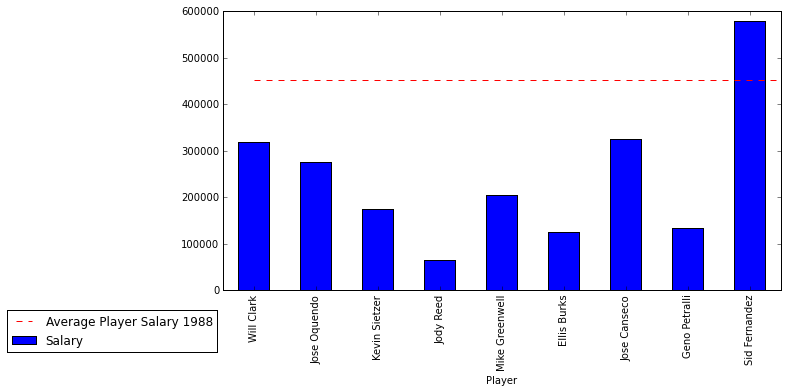

In [87]:
team_frame.plot(x='Player', y="Salary", kind="bar", figsize=(10, 5), legend=True)
plt.hlines(mean_salary_1988, xmin=0, xmax=100,color="red", linestyle="dashed", label="Average Player Salary 1988")
plt.legend(bbox_to_anchor=(0, -0.05))